In [1]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [4]:
arr = np.arange(0,10,2)  
arr = np.array([[1,2],[3,4]])
np.add.reduce(arr, 1)

a = np.array([list(map(lambda x: x, arr))[0] for arr1 in arr])
print (a)
np.add.reduce(a, 1)

[[1 2]
 [1 2]]


array([3, 3])

In [5]:
def gb_predict(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta

#     predictions = np.zeros(X.shape[0])
#     for i, x in enumerate(X):
        
#         prediction = 0
#         for alg in trees_list:
#             prediction += eta * alg.predict([x])[0]
#         predictions[i] = prediction
        
#     БЫЛО        
#     predictions = np.array(
#         [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
#     )
    
#   СТАЛО
    # заменил второй цикл на map и сделал суммирование по 0 оси с уменьшением размерности
    predictions = eta * np.add.reduce(np.array([list(map(alg.predict, [X]))[0] for alg in trees_list]), 0)
    # Альтернативный и более короткий способ оптимизации
    # predictions = eta * sum([alg.predict(X) for alg in trees_list])

    # если получили пустой заменяем на массив нулей
    if not np.any(predictions):
        predictions = np.zeros([X.shape[0]])

    return predictions

In [6]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [7]:
def residual(y, z):
    return - (z - y)

In [8]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [9]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [10]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [11]:
%%time

# Число деревьев в ансамбле
n_trees = 20

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.5

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

Wall time: 56 ms


In [12]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 20 деревьев глубиной 3     с шагом 0.5 на тренировочной выборке: 783.5366692590491
Ошибка алгоритма из 20 деревьев глубиной 3     с шагом 0.5 на тестовой выборке: 3657.0056378099553


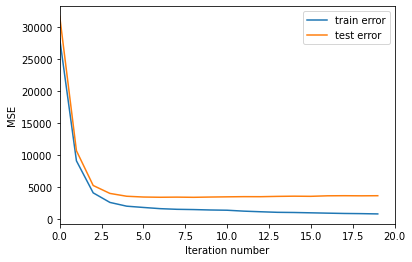

In [13]:
get_error_plot(n_trees, train_errors, test_errors)

### Задача 1
Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев.  
Сделать выводы о зависимости ошибки от этих параметров.

In [14]:
def buld_n_tree_error_plot(n_trees, X_train, X_test, y_train, y_test, max_depth=3, eta=0.5):
    rc = len(n_trees) // 3
    rows = rc + 1 if len(n_trees) % 3  else rc
    fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(30, 20))
    boost = [(n_tree, *gb_fit(n_tree, max_depth, X_train, X_test, y_train, y_test, eta)) for n_tree in n_trees]

    for i, ax in enumerate(axes.flat):
        ax.set(xticks=[], yticks=[])
        if i >= len(boost):
            break
        ax.set_xlabel('Iteration number')
        ax.set_ylabel('MSE')

        ax.set_xlim(0, boost[i][0])
        trees_count = boost[i][0]

        ax.set_title(f'Для количества деревьев {trees_count}\n min train err = {boost[i][2][-1]:.2f}\n min test err = {boost[i][3][-1]:.2f}')
        ax.set(xticks=list(range(trees_count + 1)), yticks=boost[i][2])

        ax.plot(list(range(boost[i][0])), boost[i][2], label='train error')
        ax.plot(list(range(boost[i][0])), boost[i][3], label='test error')
        ax.legend(loc='upper right')
plt.show()

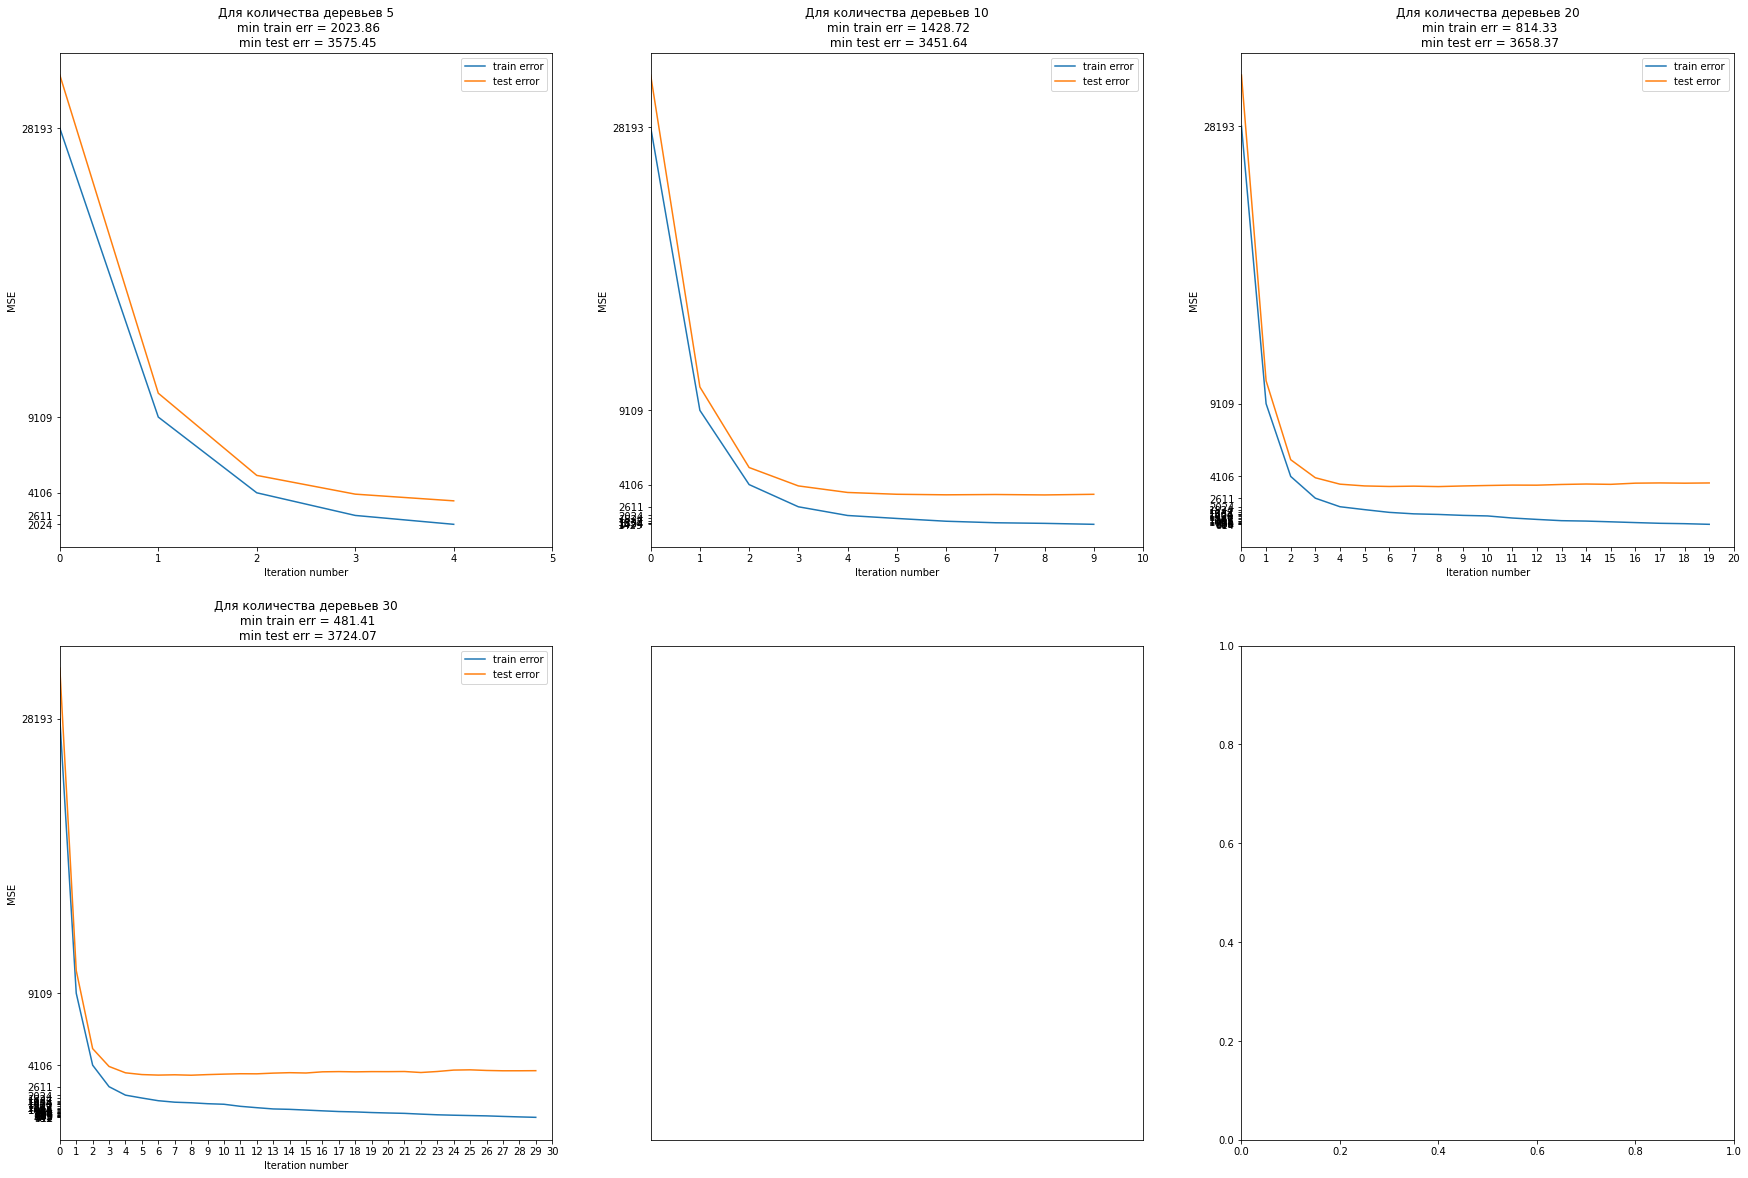

In [15]:
buld_n_tree_error_plot([5, 10, 20, 30], X_train, X_test, y_train, y_test)

In [16]:
def buld_max_depth_error_plot(max_depths, X_train, X_test, y_train, y_test, n_trees=20, eta=0.5):
    rc = len(max_depth) // 3
    rows = rc + 1 if len(max_depths) % 3  else rc
    fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(30, 20))
    boost = [(max_depth, *gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)) for max_depth in max_depths]

    for i, ax in enumerate(axes.flat):
        ax.set(xticks=[], yticks=[])
        if i >= len(boost):
            break
        ax.set_xlabel('Iteration number')
        ax.set_ylabel('MSE')

        ax.set_xlim(0, boost[i][0])
        depths_count = boost[i][0]

        ax.set_title(f'При максимальной глубине дерева {depths_count}\n min train err = {boost[i][2][-1]:.2f}\n min test err = {boost[i][3][-1]:.2f}')
        ax.set(xticks=list(range(depths_count + 1)), yticks=boost[i][2])

        ax.plot(list(range(boost[i][0])), boost[i][2], label='train error')
        ax.plot(list(range(boost[i][0])), boost[i][3], label='test error')
        ax.legend(loc='upper right')
plt.show()

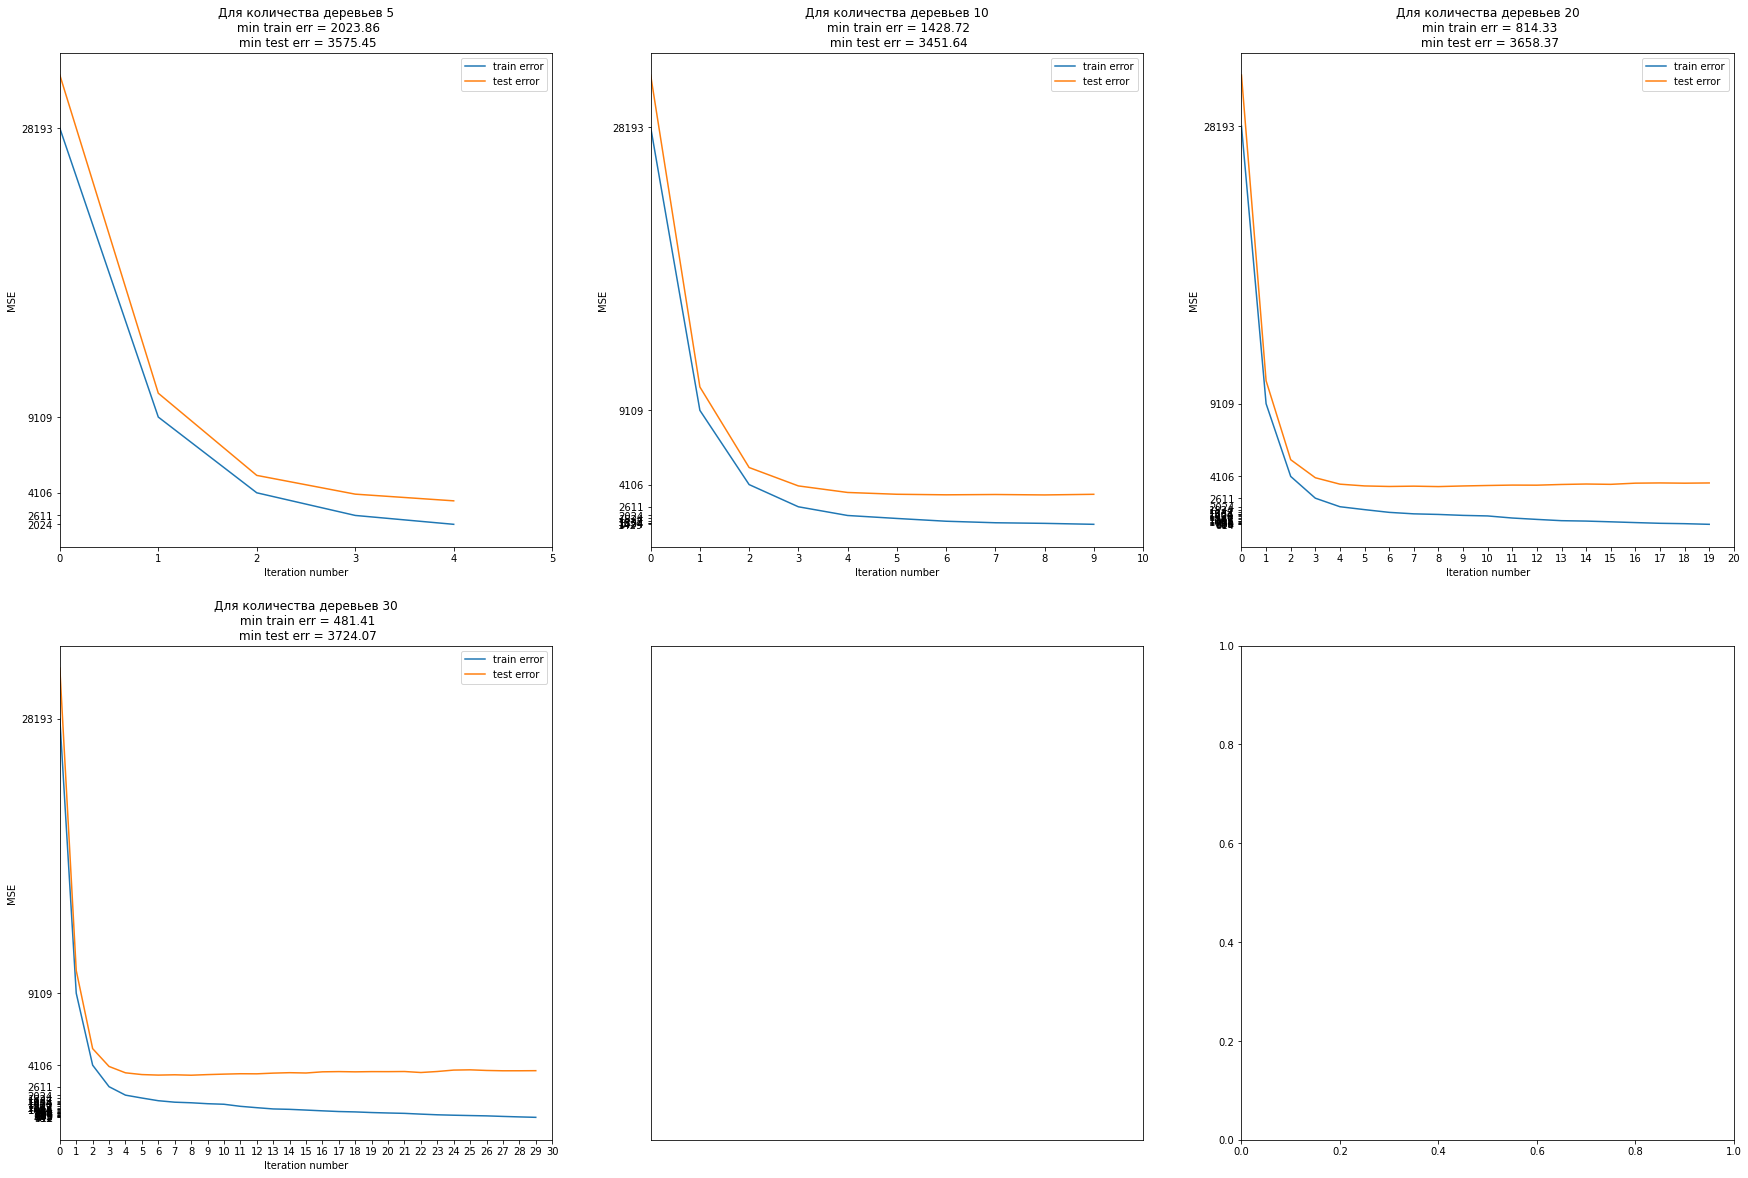

In [17]:
buld_n_tree_error_plot([5, 10, 20, 30], X_train, X_test, y_train, y_test)

### Вывод
При увеличении количества деревьев, как и при росте глубины дерева происходит переобучение.

### Задача 3*
Оптимизировать процесс обучения градиентного бустинга, чтобы он занимал меньше времени.

Внес изменения в функцию gb_predict